# K-means clustering, inertia & silhouette score  

K-means clustering is very effective when segmenting data and attempting to find patterns. Because
clustering is used in a broad array of industries, becoming proficient in this process will help you
expand your skillset in a widely applicable way.
In this activity, you are a consultant for a scientific organization that works to support and sustain
penguin colonies. You are tasked with helping other staff members learn more about penguins in
order to achieve this mission.
The data for this activity is in a spreadsheet that includes datapoints across a sample size of 345
penguins, such as species, island, and sex. Your will use a K-means clustering model to group this
data and identify patterns that provide important insights about penguins.

In [1]:
 # Import standard operational packages.
import numpy as np
import pandas as pd
# Important tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
# Import visualization packages.
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('penguins',cache = True)
df.head(7)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Data exploration

To cluster penguins of multiple different species, determine how many different types of penguin
species are in the dataset.

In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
df['species'].value_counts(dropna = False)

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

****There are three types of species. Note the Chinstrap species is less common than the other species.
This has a chance to affect K-means clustering as K-means performs best with similar sized groupings.****

****For purposes of clustering, pretend you don’t know that there are three different types of species.
Then, you can explore whether the algorithm can discover the different species. You might even
find other relationships in the data.****


# An assumption of K-means is that there are no missing values. Check for missing values in the rows of the data.


In [6]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
df2 = df.dropna(axis=0).reset_index(drop = True)


'''Use dropna. Note that an axis parameter passed in to this function should be set to 0 if you
want to drop rows containing missing values or 1 if you want to drop columns containing missing
values. Optionally, reset_index may also be used to avoid a SettingWithCopy warning later in
the notebook

In [8]:
df2.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Some versions of the penguins dataset have values encoded in the sex column as ‘Male’ and ‘Female’
instead of ‘MALE’ and ‘FEMALE’. The code below will make sure all values are ALL CAPS.

In [9]:
df2['sex'] = df2['sex'].str.upper()

K-means needs numeric columns for clustering. Convert the categorical column 'sex' into numeric.
There is no need to convert the 'species' column because it isn’t being used as a feature in the
clustering algorithm

In [10]:
df2 = pd.get_dummies(df2, drop_first = True ,columns=['sex'])

****Drop the categorical column island from the dataset. While it has value, this notebook is trying
to confirm if penguins of the same species exhibit different physical characteristics based on sex.
This doesn’t include location.****

In [11]:
df2 = df2.drop(columns= ['island'],axis =1)

Because K-means uses distance between observations as its measure of similarity, it’s important
to scale the data before modeling. Use a third-party tool, such as scikit-learn’s StandardScaler
function. StandardScaler scales each point xff by subtracting the mean observed value for that
feature and dividing by the standard deviation.

****This ensures that all variables have a mean of 0 and variance/standard deviation of 1.****

In [12]:
x = df2.drop(columns='species',axis = 1)

In [13]:
#Scale the features.
#Assign the scaled data to variable `X_scaled`.

x_scaled = StandardScaler().fit_transform(x)


Now, fit K-means and evaluate inertia for different values of k. Because you may not know how many
clusters exist in the data, start by fitting K-means and examining the inertia values for different
values of k. To do this, write a function called kmeans_inertia that takes in num_clusters and
x_vals (X_scaled) and returns a list of each k-value’s inertia.
When using K-means inside the function, set the random_state to 42. This way, others can
reproduce your results.

In [14]:
num_clusters = [i for i in range(2, 11)]
def kmeans_inertia(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array.
    Fits a KMeans model where k = each value in the list of ints.
    Returns each k-value's inertia appended to a list.
    """
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    return inertia

In [15]:
# Return a list of inertia for k=2 to 10.
inertia = kmeans_inertia(num_clusters, x_scaled)
inertia

[885.622414365225,
 578.8284278107237,
 386.14534424773325,
 284.5464837898291,
 217.92858573807692,
 201.3928784342327,
 186.8227063489922,
 173.4728315424275,
 164.55854201979952]

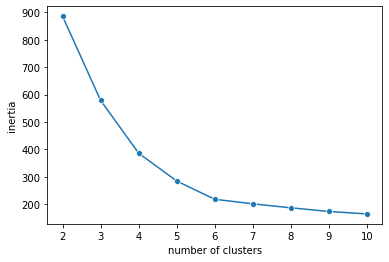

In [16]:
plot = sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plot.set_xlabel("number of clusters");
plot.set_ylabel("inertia");


The plot seems to depict an elbow at six clusters, but there isn’t a clear method for confirming
that a six-cluster model is optimal. Therefore, the silhouette scores should be checked.

In [17]:
num_clusters = [i for i in range(2, 11)]


def kmeans_sil(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array.
    Fits a KMeans model where k = each value in the list of ints.
    Calculates a silhouette score for each k value.
    Returns each k-value's silhouette score appended to a list.
    """
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
        
    return sil_score

sil_score = kmeans_sil(num_clusters, x_scaled)
sil_score

[0.44398088353055243,
 0.45101024097188364,
 0.5080140996630784,
 0.519998574860868,
 0.5263224884981607,
 0.47774022332151733,
 0.42680523270292947,
 0.35977478703657334,
 0.35898834106103644]

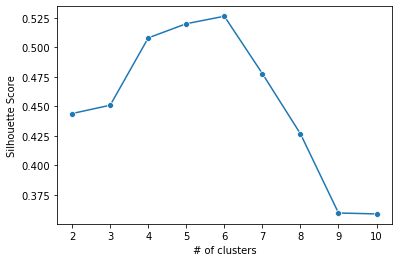

In [18]:
plot = sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");


Silhouette scores near 1 indicate that samples are far away from neighboring clusters. Scores close
to 0 indicate that samples are on or very close to the decision boundary between two neighboring
clusters.

The plot indicates that the silhouette score is closest to 1 when the data is partitioned into six
clusters, although five clusters also yield a relatively good silhouette score.

In [19]:
# Fit a 6-cluster model.

kmeans6 = KMeans(n_clusters=6, random_state=42)
kmeans6.fit(x_scaled)


KMeans(n_clusters=6, random_state=42)

In [20]:
print('Unique labels:', np.unique(kmeans6.labels_))

Unique labels: [0 1 2 3 4 5]


Now, create a new column cluster that indicates cluster assignment in the DataFrame
penguins_subset. It’s important to understand the meaning of each cluster’s labels, then decide whether the clustering makes sense.

****Note: This task is done using penguins_subset ( *df2* ) because it is often easier to interpret unscaled
data.****

In [21]:
# creae a new columns clusters
df2['cluster'] = kmeans6.labels_

In [22]:
df2.head(8)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,cluster
0,Adelie,39.1,18.7,181.0,3750.0,1,0
1,Adelie,39.5,17.4,186.0,3800.0,0,2
2,Adelie,40.3,18.0,195.0,3250.0,0,2
3,Adelie,36.7,19.3,193.0,3450.0,0,2
4,Adelie,39.3,20.6,190.0,3650.0,1,0
5,Adelie,38.9,17.8,181.0,3625.0,0,2
6,Adelie,39.2,19.6,195.0,4675.0,1,0
7,Adelie,41.1,17.6,182.0,3200.0,0,2


In [23]:
 # Verify if any `cluster` can be differentiated by `species`.

df2.groupby(by=['cluster', 'species']).size()

cluster  species  
0        Adelie       71
1        Gentoo       58
2        Adelie       73
         Chinstrap     5
3        Gentoo       61
4        Adelie        2
         Chinstrap    34
5        Chinstrap    29
dtype: int64

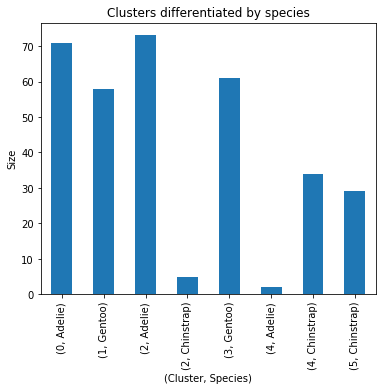

In [24]:
df2.groupby(by=['cluster', 'species']).size().plot.bar(title='Clusters differentiated by species',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster, Species)');


In [25]:
# Verify if each `cluster` can be differentiated by `species` AND `sex_MALE`.



df2.groupby(by=['cluster','species', 'sex_MALE']).size().sort_values(ascending = False)

cluster  species    sex_MALE
2        Adelie     0           73
0        Adelie     1           71
3        Gentoo     1           61
1        Gentoo     0           58
4        Chinstrap  1           34
5        Chinstrap  0           29
2        Chinstrap  0            5
4        Adelie     1            2
dtype: int64

**Question:** Are the clusters differentiated by `'species'` and `'sex_MALE'`?

Even though clusters 1 and 3 weren't all one species or sex, the `groupby` indicates that the algorithm produced clusters mostly differentiated by species and sex. 


Finally, interpret the groupby outputs and visualize these results. The graph shows that each `'cluster'` can be differentiated by `'species'` and `'sex_MALE'`. Furthermore, each cluster is mostly comprised of one sex and one species. 

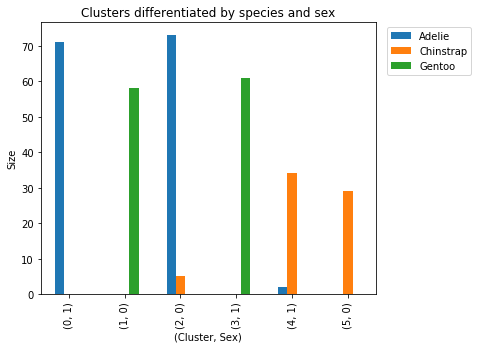

In [26]:
df2.groupby(by=['cluster','species','sex_MALE']).size().unstack(level = 'species', fill_value=0).plot.bar(
    title='Clusters differentiated by species and sex', figsize=(6, 5),ylabel='Size',
 xlabel='(Cluster, Sex)')
plt.legend(bbox_to_anchor=(1.3, 1.0))

## **Considerations**

**What are some key takeaways that you learned during this lab? Consider the process you used, key tools, and the results of your investigation.**
-   Many machine learning workflows are about cleaning, encoding, and scaling data.
-   Inertia and silhouette score can be used to find the optimal value of clusters.
-   Clusters can find natural groupings in data. 
-   The clusters in this lab are mostly differentiated by species and sex as shown by the groupby results and corresponding graphs. 
-   The elbow plot and especially the silhouette scores suggests that 6 clusters are optimal for this data.
-   Having 6 clusters makes sense because the study suggests that there is sexual dimorphism (differences between the sexes) for each of the three species (2 sexes * 3 different species = 6 clusters).

**What summary would you provide to stakeholders?**
*  The K-means clustering enabled this data to be effectively grouped. It helped identify patterns that can educate team members about penguins.
*  The success of the cluster results suggests that the organization can apply clustering to other projects and continue augmenting employee education.